In [1]:
#!/usr/bin/env python3
import os
import re
import sys
print(sys.executable)
print(sys.path)
print(sys.version)

import collections
import argparse
#import tables
import itertools
import matplotlib
import glob
import math
%matplotlib inline

import scipy.io
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import scipy.sparse as sp_sparse
import scanpy as sc 
import scanpy.external as sce

from collections import defaultdict
from scipy import sparse, io

import scanpy.external as sce
import matplotlib

from scipy.sparse import csr_matrix
from multiprocessing import Pool
#from matplotlib_venn import venn2, venn2_circles
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

print('numpy', np.__version__)
print('pandas', pd.__version__)
print('scipy', scipy.__version__)
print('matplotlib', matplotlib.__version__)
print('scanpy', sc.__version__)

!date +%F

/home2/s426305/.conda/envs/py36/bin/python
['', '/cm/shared/apps/cnvkit/0.9.5/lib/python3.6/site-packages', '/cm/shared/apps/python/3.6.4-anaconda/lib', '/cm/shared/apps/jupyterkernel-matlab/0.16.1/lib/python3.6/site-packages', '/home2/s426305/.conda/envs/py36/lib/python36.zip', '/home2/s426305/.conda/envs/py36/lib/python3.6', '/home2/s426305/.conda/envs/py36/lib/python3.6/lib-dynload', '/home2/s426305/.local/lib/python3.6/site-packages', '/home2/s426305/.conda/envs/py36/lib/python3.6/site-packages', '/home2/s426305/.conda/envs/py36/lib/python3.6/site-packages/IPython/extensions', '/home2/s426305/.ipython']
3.6.7 | packaged by conda-forge | (default, Jul  2 2019, 02:18:42) 
[GCC 7.3.0]
numpy 1.16.1
pandas 0.25.1
scipy 1.1.0
matplotlib 3.3.3
scanpy 1.4
2021-10-12


## Load data
____

In [2]:
DATA_DIR = '../Data/'
clonal_pval = pd.read_pickle(DATA_DIR + 'Random_clonal_cells_overlap_pval_1000.pkl').astype(float)
non_clonal_pval = pd.read_pickle(DATA_DIR + 'Random_non-clonal_cells_overlap_pval_1000.pkl').astype(float)

In [3]:
#Clone region dict
Clone_region_dict = {}
Clone_dict_file = DATA_DIR + 'YWsg1P1-clone_tree.0.05.txt'
with open(Clone_dict_file) as f:
    first_line = f.readline()
    word = '}'
    for line in f:
        if not word in line:
            ID, clones = line.split(":")
            clone_IDs = clones.replace("'[", "").replace("]',", "").replace("'", "").strip(' \n')
            individual_clone_ID = clone_IDs.split(', ')
            for i in individual_clone_ID:
                Clone_region_dict.update({i: ID.strip("'")})

In [4]:
region_list = []
for i in clonal_pval.columns:
    region = Clone_region_dict[i]
    region_list.append(region)

In [5]:
x = collections.Counter(region_list)
most_common_region_list = sorted(x, key=x.get, reverse=True)

In [6]:
sort_size_index = []
for j in np.arange(len(most_common_region_list)):
    sort_index = [i for i, e in enumerate(region_list) if e == most_common_region_list[j]]
    for k in sort_index:
        sort_size_index.append(k)

In [7]:
len(sort_size_index)

1000

In [8]:
clonal_pval.iloc[sort_size_index, sort_size_index]

,CTCTCGATCCGAACGC-5,CTGAGCGGTAAGTTGA-2,CGGGTCACACATATGC-2,CTTACCGTCCTACGAA-5,GCAACATTCTCCAATT-4,GTTCGCTTCATCACCC-4,CAGAGCCCAAGGGTCA-5,GTGGAGATCAGAGCGA-5,CGGAACCCATGAGGGT-4,GTCGCGATCGACCTAA-2,...,AAGTACCGTCTGTTAG-1,AGCTCAAGTTCCACGG-5,GTGCTGGAGCTAGCCC-6,ACAGGGAGTGACATCT-1,GAGGCAAAGTGTTGTC-5,GGCTTGGAGAAGCGAA-5,TCGTCCAGTGTACAGG-5,TTCGATTGTTGCTCAA-6,CATGAGTTCCGGACTG-5,AAATGGAGTTCAGTAC-6
CTCTCGATCCGAACGC-5,1.384614e-94,3.050431e-70,1.875941e-82,1.136094e-83,1.384614e-94,7.835883e-85,1.136094e-83,7.835883e-85,1.136094e-83,5.064313e-81,...,1.0,0.084290,1.0,1.0,1.0,9.088675e-02,1.000000e+00,1.026447e-01,1.000000e+00,1.000000e+00
CTGAGCGGTAAGTTGA-2,3.050431e-70,3.194036e-80,9.653275e-68,3.793078e-75,3.050431e-70,6.539789e-76,3.793078e-75,6.539789e-76,3.793078e-75,1.127114e-71,...,1.0,0.070274,1.0,1.0,1.0,1.000000e+00,1.000000e+00,8.572075e-02,1.000000e+00,1.000000e+00
CGGGTCACACATATGC-2,1.875941e-82,9.653275e-68,5.133938e-86,2.451545e-77,1.875941e-82,3.381604e-78,2.451545e-77,3.381604e-78,2.451545e-77,3.035461e-74,...,1.0,0.075905,1.0,1.0,1.0,8.187533e-02,1.000000e+00,9.252779e-02,1.000000e+00,1.000000e+00
CTTACCGTCCTACGAA-5,1.136094e-83,3.793078e-75,2.451545e-77,1.384614e-94,1.136094e-83,2.783904e-90,1.384614e-94,2.783904e-90,1.384614e-94,2.798798e-86,...,1.0,0.084290,1.0,1.0,1.0,9.088675e-02,1.000000e+00,1.026447e-01,1.000000e+00,1.000000e+00
GCAACATTCTCCAATT-4,1.384614e-94,3.050431e-70,1.875941e-82,1.136094e-83,1.384614e-94,7.835883e-85,1.136094e-83,7.835883e-85,1.136094e-83,5.064313e-81,...,1.0,0.084290,1.0,1.0,1.0,9.088675e-02,1.000000e+00,1.026447e-01,1.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGCTTGGAGAAGCGAA-5,9.088675e-02,1.000000e+00,8.187533e-02,9.088675e-02,9.088675e-02,8.789267e-02,9.088675e-02,8.789267e-02,9.088675e-02,8.488887e-02,...,1.0,1.000000,1.0,1.0,1.0,5.282120e-192,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
TCGTCCAGTGTACAGG-5,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.0,1.000000,1.0,1.0,1.0,1.000000e+00,2.054914e-199,1.000000e+00,1.000000e+00,1.000000e+00
TTCGATTGTTGCTCAA-6,1.026447e-01,8.572075e-02,9.252779e-02,1.026447e-01,1.026447e-01,9.928482e-02,1.026447e-01,9.928482e-02,1.026447e-01,9.591254e-02,...,1.0,0.203870,1.0,1.0,1.0,1.000000e+00,1.000000e+00,4.568653e-214,1.000000e+00,1.000000e+00
CATGAGTTCCGGACTG-5,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.0,1.000000,1.0,1.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00,5.975929e-197,1.000000e+00


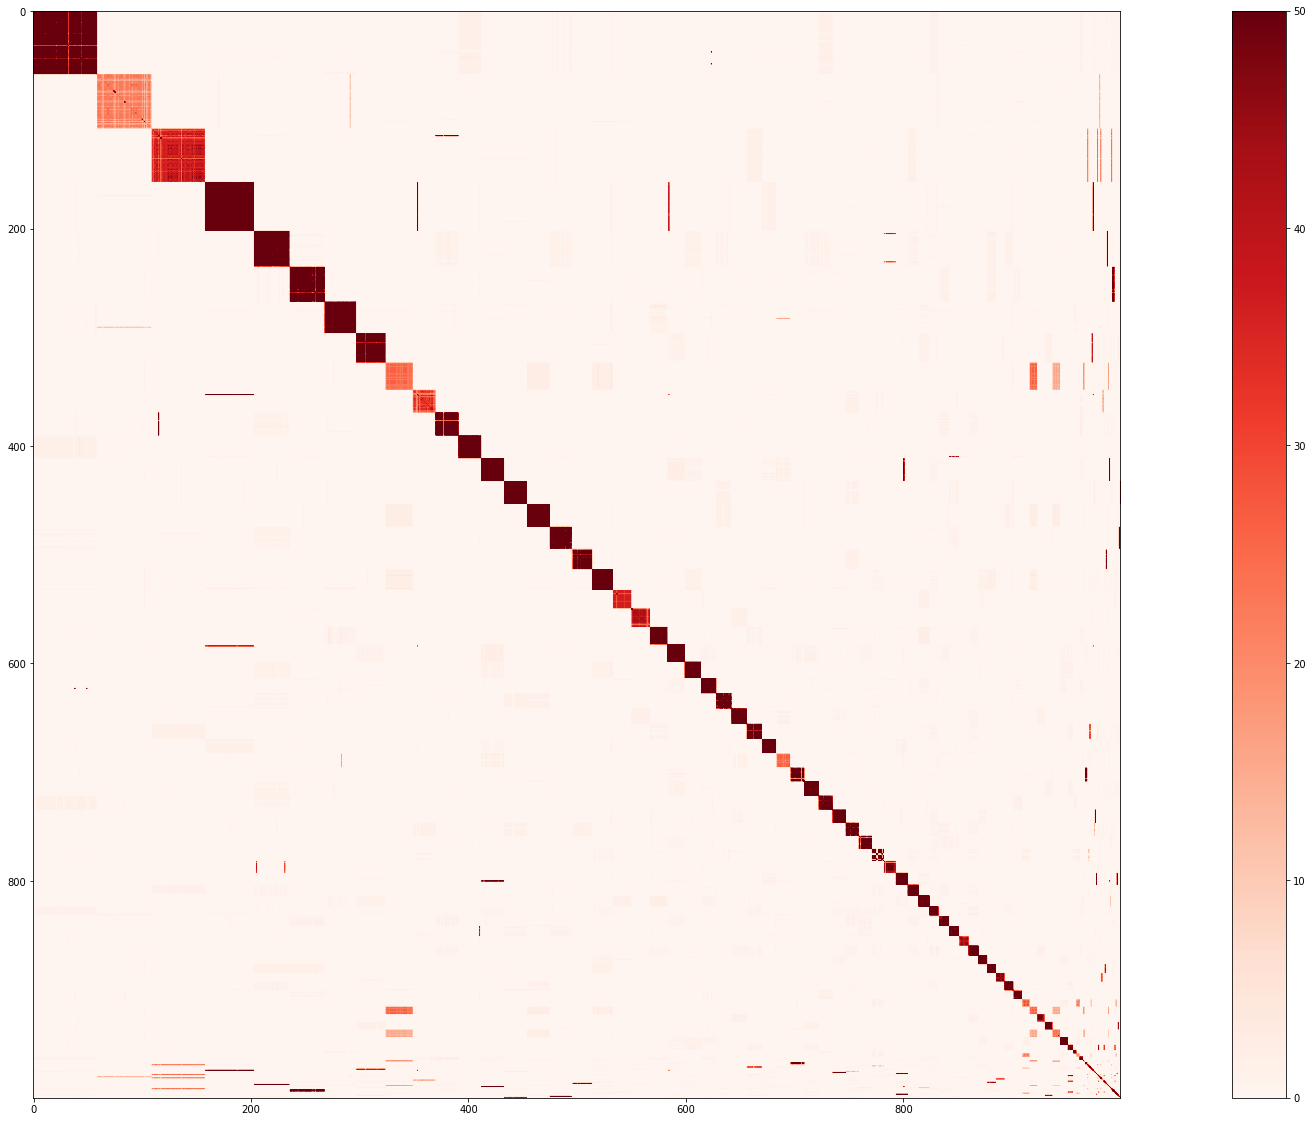

In [11]:
fig, ax = plt.subplots(figsize= (40, 20))
plt.imshow(-np.log10(clonal_pval.iloc[sort_size_index, sort_size_index].astype(float)), cmap='Reds', vmax=50, rasterized=True)
plt.colorbar()
#plt.savefig(DATA_DIR + 'Overlap_heatmap-clonal_pval_sort.pdf')

### Non-clonal
____

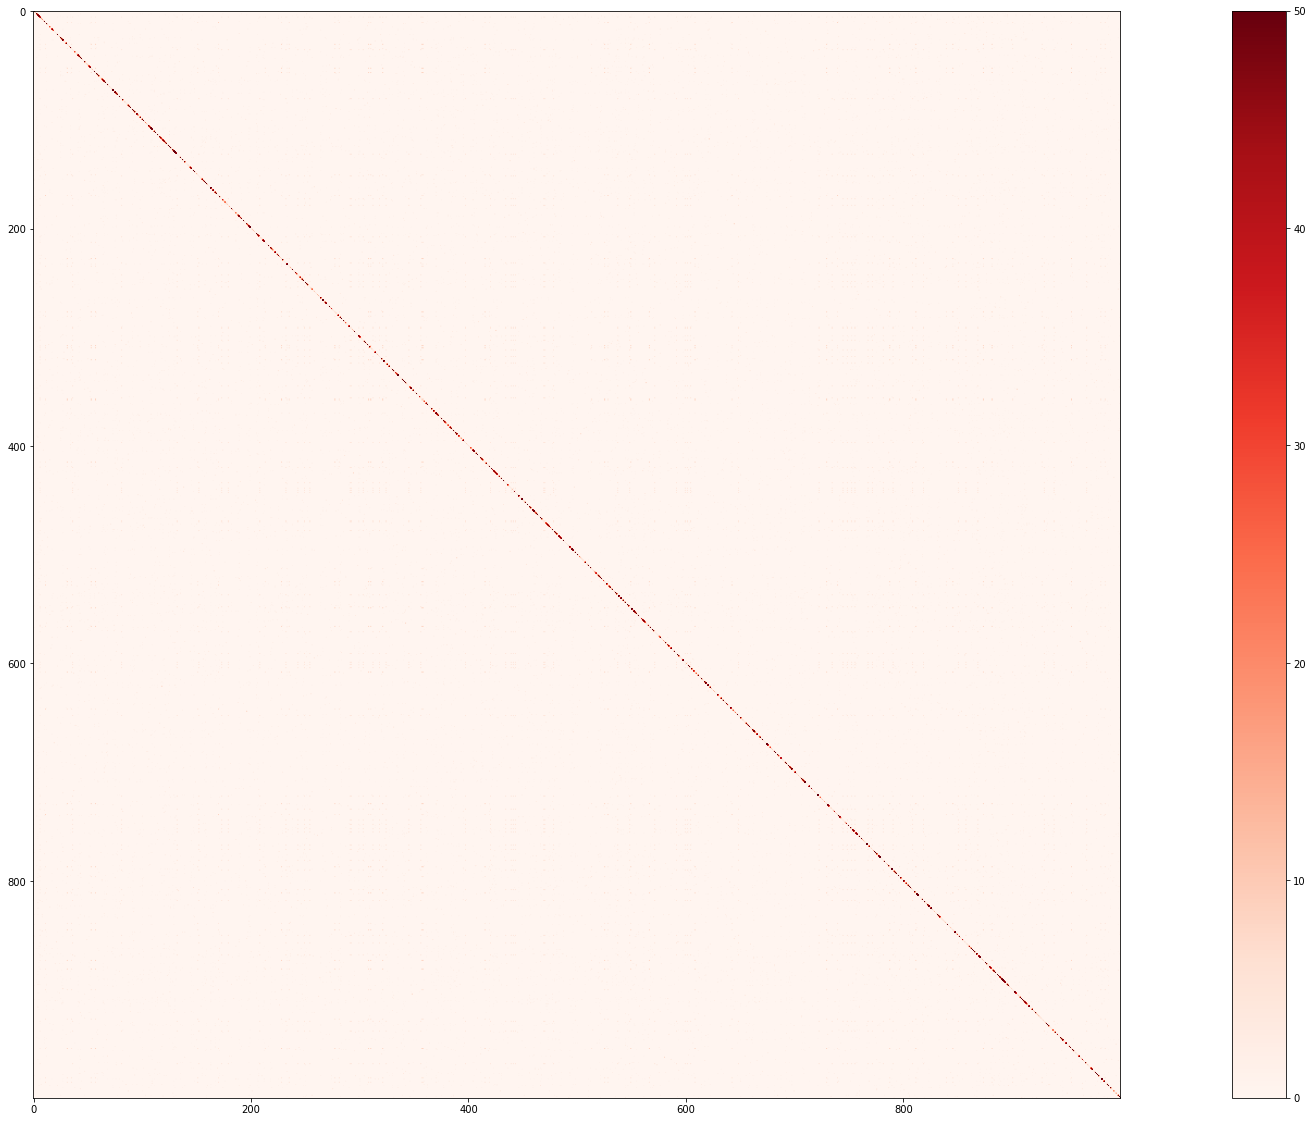

In [12]:
fig, ax = plt.subplots(figsize= (40, 20))
plt.imshow(-np.log10(non_clonal_pval.astype(float)), cmap='Reds', vmax=50, rasterized=True)
plt.colorbar()
plt.savefig(DATA_DIR + 'Plot_jupyter/Overlap_heatmap-non_clonal_pval.pdf')

### D7 dataset
____

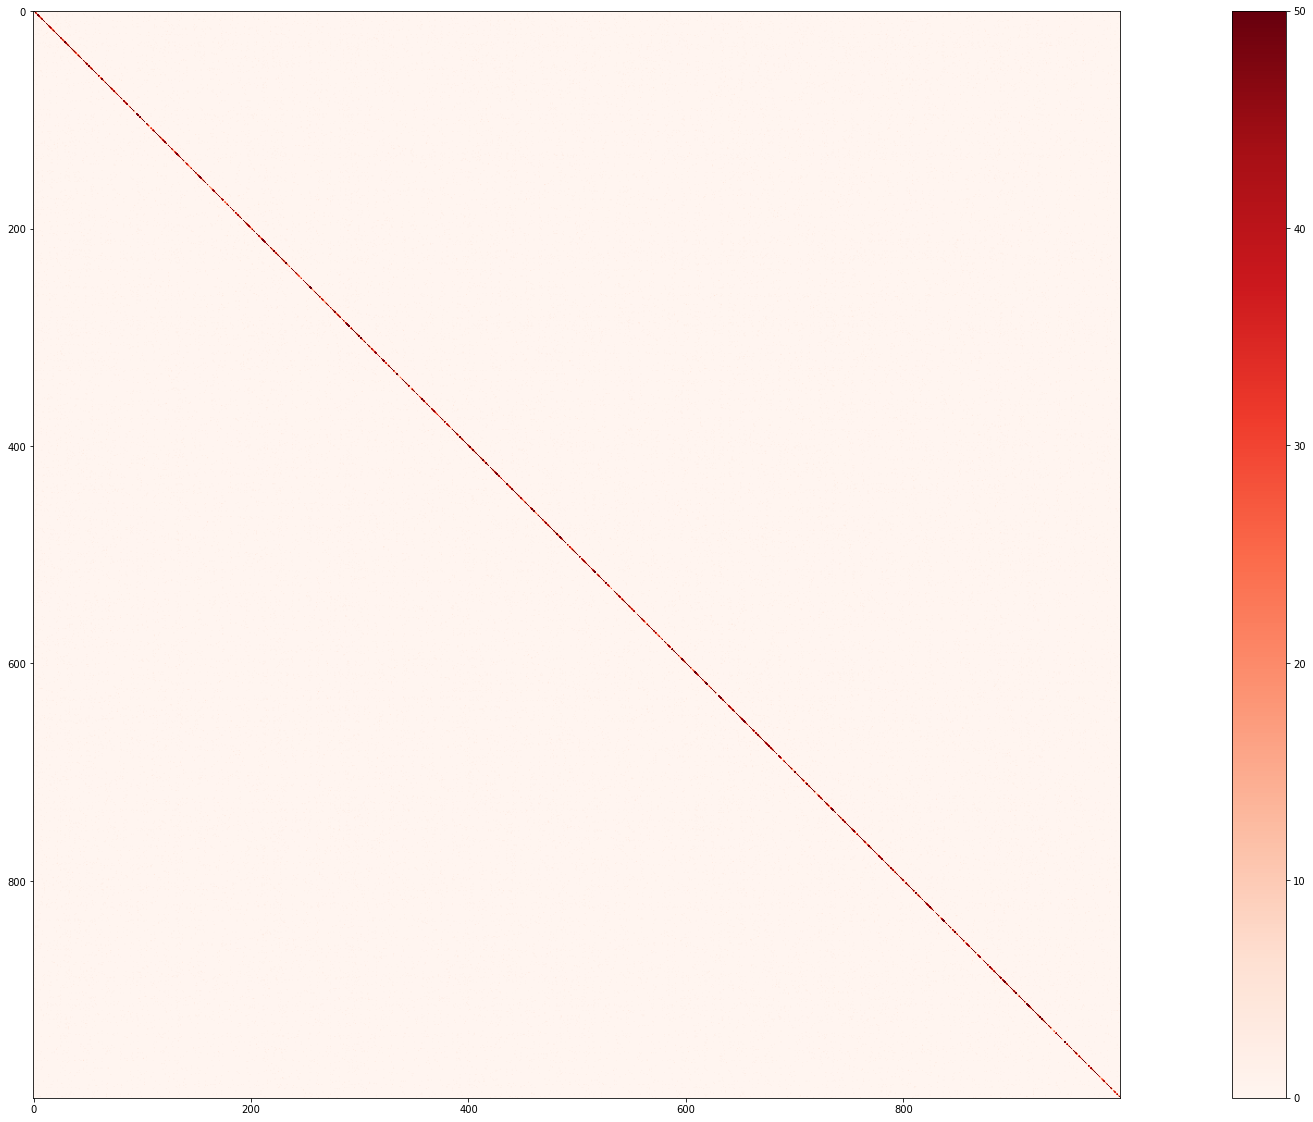

In [13]:
fig, ax = plt.subplots(figsize= (40, 20))
plt.imshow(-np.log10(D7_overlap.astype(float)), cmap='Reds', vmax=50, rasterized=True)
plt.colorbar()
plt.savefig(DATA_DIR + 'Plot_jupyter/Overlap_heatmap-D7_pval.pdf')